In [1722]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [1723]:
df=pd.read_csv("final_nvmp.csv")

In [1724]:
#preview the dataset

df.head()

,Station Code,Name of Monitoring Location,State Name,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Drinkability
0,26,"BORE WELL AT KANURUPANCHAYAT, VIJAYAWADA",ANDHRA PRADESH,24,24,7.28,7.4,2300,2390,2.2,2.4,3.15,3.77,3,3,11,21,1356,1480,0.38,0.44,BDL,BDL,Not Drinkable
1,1513,"BORE WELL AT AUTONAGAR, VIJAYAWADA.( IN THE R/...",ANDHRA PRADESH,24,24,7.07,7.86,2140,2210,2.2,2.2,1.38,-3.42,3,4,13,20,1260,1328,0.32,0.36,BDL,BDL,Not Drinkable
2,1514,"BORE WELL AT AUTONAGAR, VIJAYAWADA.( IN THE R/...",ANDHRA PRADESH,25,25,-7.21,7.26,1996,2160,2,2.2,3.61,3.99,3,3,11,15,1178,1260,0.68,0.71,0.0019,0.0019,Not Drinkable
3,1516,"BOREWELL OF NAVLOKGARDENS, NELLORE TOWN",ANDHRA PRADESH,20,21,7.85,8.06,1270,1340,1.8,2,1.31,1.43,3,3,14,15,750,790,0.26,0.3,0.0027,0.0027,Not Drinkable
4,1517,"BOREWELL NEAR TUNGBHADRA RIVER, MAMIDALAPADU (...",ANDHRA PRADESH,21,24,7.2,7.5,2068,6410,1.2,1.2,3.12,6.91,9,9,53,53,1349,3846,0.5,1.2,BDL,BDL,Not Drinkable


In [1725]:
#Seeing all the numeric columns

[col for col in df.columns if df[col].dtype!='O']

['Station Code']

In [1726]:
df['Name of Monitoring Location'].value_counts()

MANDI GOBINDGARH, PUNJAB                                         2
TUBE WELL AT BISHALGARH                                          2
HAMIRA VILLAGE, PUNJAB                                           2
LEATHER COMPLEX, JALANDHAR,PUNJAB                                2
NANGAL, PUNJAB                                                   2
                                                                ..
HAND PUMP AT TAHLIWALBAZAR                                       1
HAND PUMP AT KEYLONG                                             1
BOREWELL NEAR UNA?HAROLI BRIDGE  INDUSTRIAL AREAJEETPUR BEHRI    1
HANDPUMP NEAR SATSANGBHAWAN  VILLAGE MUGLA                       1
GROUND WATER AT SHYAMPUR BUDGE BUDGE                             1
Name: Name of Monitoring Location, Length: 1111, dtype: int64

In [1727]:
# Extract the source information from the full string into a new column

source_pattern = r'\b(HAND\s?PUMP|BORE\s?WELL|TUBE\s?WELL|GROUND\s?WATER|OPEN\s?WELL|INDUSTRIAL\s?AREA|\bWELL\b)\b'


df['Source'] = df['Name of Monitoring Location'].str.extract(source_pattern, flags=re.IGNORECASE)

In [1728]:
#Remove spaces from the string stored

df['Source'] = df['Source'].str.replace(r'\s+', '')


/var/folders/y3/2lx6njq91dz_msk7w16nrqmm0000gn/T/ipykernel_40358/2067488281.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Source'] = df['Source'].str.replace(r'\s+', '')


In [1729]:
# Get the count of different sources 

df['Source'].value_counts()

BOREWELL          222
WELL              207
GROUNDWATER       182
TUBEWELL          100
HANDPUMP           91
OPENWELL           18
INDUSTRIALAREA     17
Name: Source, dtype: int64

In [1730]:
df['Source'].isnull().sum()


282

In [1731]:
# Replace BDL values with 0 and ? with null 

df.replace(['BDL','?'],[0,pd.NA],inplace=True)

In [1732]:
# Get the count of different attributes

df['State Name'].value_counts()

RAJASTHAN            100
ODISHA                89
GUJARAT               84
BIHAR                 70
WEST BENGAL           68
ASSAM                 66
TRIPURA               55
UTTAR PRADESH         53
MADHYA PRADESH        49
HIMACHAL PRADESH      48
DELHI                 45
PUNJAB                43
TELANGANA             42
LAKSHADWEEP           42
MAHARASHTRA           39
KERALA                35
ANDHRA PRADESH        33
MIZORAM               24
PUDUCHERRY            22
TAMIL NADU            21
MEGHALAYA             13
HARYANA               13
JAMMU AND KASHMIR     13
DAMAN AND DIU         12
NAGALAND              10
GOA                    9
MANIPUR                7
CHHATTISGARH           6
CHANDIGARH             4
JHARKHAND              3
KARNATAKA              1
Name: State Name, dtype: int64

In [1733]:
df['BOD_Min'].value_counts()

0      408
1.1     65
1.2     30
1.4     26
2.2     21
2.4     21
2.3     20
2       18
1.6     18
1.8     17
2.5     16
1.5     15
1.3     12
2.6      8
3.2      8
2.1      8
5        6
2.8      6
3        5
3.4      4
1.9      4
1.7      4
4.4      3
4.2      2
2.7      2
6        2
3.5      1
1        1
5.6      1
4.8      1
3.6      1
269      1
18       1
4.6      1
5.8      1
7.2      1
Name: BOD_Min, dtype: int64

In [1734]:
# Drop the attribute Name of Monitoring Location as it is already replaced by source 

df.drop(columns=['Name of Monitoring Location'],axis=1,inplace=True)

In [1735]:
# Get the total count of null values in different attributes

df.isnull().sum()

Station Code                    0
State Name                      0
Temp_Min                      119
Temp_Max                      119
pH_Min                          9
pH_Max                         15
Conductivity_Min               53
Conductivity_Max               53
BOD_Min                       360
DOB_Max                       360
Nitrate?N + Nitrite_N Min     182
Nitrate?N + Nitrite_N Max     185
Fecal Coliform_Min            287
Fecal Coliform_Max            283
Total Coliform_Min            278
Total Coliform_Max            278
Total Dissolved Solids_Min    116
Total Dissolved Solids_Max    116
Fluoride_Min                  211
Fluoride_Max                  211
Arsenic_Min                   637
Arsenic_Max                   637
Drinkability                    0
Source                        282
dtype: int64

In [1736]:
# Get the median value for all of the numeric columns 

median=df.median()

/var/folders/y3/2lx6njq91dz_msk7w16nrqmm0000gn/T/ipykernel_40358/896887288.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median=df.median()


In [1737]:
median

Station Code                  3172.000
Temp_Min                        26.000
Temp_Max                        28.000
pH_Min                           7.200
pH_Max                           7.470
Conductivity_Min               676.000
Conductivity_Max               870.500
BOD_Min                          0.000
DOB_Max                          0.000
Nitrate?N + Nitrite_N Min        0.860
Nitrate?N + Nitrite_N Max        1.595
Fecal Coliform_Min               2.000
Fecal Coliform_Max               2.000
Total Coliform_Min               4.500
Total Coliform_Max               8.000
Total Dissolved Solids_Min     470.000
Total Dissolved Solids_Max     578.000
Fluoride_Min                     0.310
Fluoride_Max                     0.415
Arsenic_Min                      0.000
Arsenic_Max                      0.000
dtype: float64

In [1738]:
#fill all the null values with the median values of the respective column

df.fillna(median,inplace=True)

In [1739]:
df['Temp_Max'].value_counts()

28.0    119
28      114
29       95
30       93
27       84
       ... 
34.8      1
32.7      1
30.9      1
30.3      1
37        1
Name: Temp_Max, Length: 96, dtype: int64

In [1740]:
df.isnull().sum()

Station Code                    0
State Name                      0
Temp_Min                        0
Temp_Max                        0
pH_Min                          0
pH_Max                          0
Conductivity_Min                0
Conductivity_Max                0
BOD_Min                         0
DOB_Max                         0
Nitrate?N + Nitrite_N Min       0
Nitrate?N + Nitrite_N Max       0
Fecal Coliform_Min              0
Fecal Coliform_Max              0
Total Coliform_Min              0
Total Coliform_Max              0
Total Dissolved Solids_Min      0
Total Dissolved Solids_Max      0
Fluoride_Min                    0
Fluoride_Max                    0
Arsenic_Min                     0
Arsenic_Max                     0
Drinkability                    0
Source                        282
dtype: int64

In [1741]:
# Perform One hot encoding for the 'Source' column 

encoded_data = pd.get_dummies(df['Source'], dummy_na=True, prefix='Type')

# Concatenate the encoded data with the original DataFrame
df = pd.concat([df, encoded_data], axis=1)

# Drop the original 'Source' column if needed
df.drop('Source', axis=1,inplace=True)

In [1742]:
df.head()

,Station Code,State Name,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Drinkability,Type_BOREWELL,Type_GROUNDWATER,Type_HANDPUMP,Type_INDUSTRIALAREA,Type_OPENWELL,Type_TUBEWELL,Type_WELL,Type_nan
0,26,ANDHRA PRADESH,24,24,7.28,7.4,2300,2390,2.2,2.4,3.15,3.77,3,3,11,21,1356,1480,0.38,0.44,0,0,Not Drinkable,1,0,0,0,0,0,0,0
1,1513,ANDHRA PRADESH,24,24,7.07,7.86,2140,2210,2.2,2.2,1.38,-3.42,3,4,13,20,1260,1328,0.32,0.36,0,0,Not Drinkable,1,0,0,0,0,0,0,0
2,1514,ANDHRA PRADESH,25,25,-7.21,7.26,1996,2160,2,2.2,3.61,3.99,3,3,11,15,1178,1260,0.68,0.71,0.0019,0.0019,Not Drinkable,1,0,0,0,0,0,0,0
3,1516,ANDHRA PRADESH,20,21,7.85,8.06,1270,1340,1.8,2,1.31,1.43,3,3,14,15,750,790,0.26,0.3,0.0027,0.0027,Not Drinkable,1,0,0,0,0,0,0,0
4,1517,ANDHRA PRADESH,21,24,7.2,7.5,2068,6410,1.2,1.2,3.12,6.91,9,9,53,53,1349,3846,0.5,1.2,0,0,Not Drinkable,1,0,0,0,0,0,0,0


In [1743]:
df.describe()

,Station Code,Type_BOREWELL,Type_GROUNDWATER,Type_HANDPUMP,Type_INDUSTRIALAREA,Type_OPENWELL,Type_TUBEWELL,Type_WELL,Type_nan
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,3153.143878,0.198391,0.162645,0.081323,0.015192,0.016086,0.089366,0.184987,0.252011
std,1143.446111,0.398967,0.369207,0.273452,0.122371,0.125862,0.285398,0.388460,0.434362
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2036.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4185.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5258.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1744]:
# Use LabelEncoder to encode the 'State' attribute to numeric values 

from sklearn.preprocessing import LabelEncoder

In [1745]:
lb=LabelEncoder()
df['State Name N']=lb.fit_transform(df['State Name'])

In [1746]:
df.drop(columns=['State Name'],axis=1,inplace=True)

In [1747]:
df.describe()

,Station Code,Type_BOREWELL,Type_GROUNDWATER,Type_HANDPUMP,Type_INDUSTRIALAREA,Type_OPENWELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,3153.143878,0.198391,0.162645,0.081323,0.015192,0.016086,0.089366,0.184987,0.252011,16.549598
std,1143.446111,0.398967,0.369207,0.273452,0.122371,0.125862,0.285398,0.388460,0.434362,9.762153
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2036.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,3172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,4185.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
max,5258.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [1748]:
# Convert the attributes to floating type 

df[[val for val in df.columns if val!='Drinkability']]=df[[val for val in df.columns if val!='Drinkability']].astype(float)

In [1749]:
df.describe()
df.drop(columns='Station Code',axis=1,inplace=True)

In [1750]:
df1=df.copy()

In [1751]:
df.head()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Drinkability,Type_BOREWELL,Type_GROUNDWATER,Type_HANDPUMP,Type_INDUSTRIALAREA,Type_OPENWELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
0,24.0,24.0,7.28,7.40,2300.0,2390.0,2.2,2.4,3.15,3.77,3.0,3.0,11.0,21.0,1356.0,1480.0,0.38,0.44,0.0000,0.0000,Not Drinkable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,24.0,7.07,7.86,2140.0,2210.0,2.2,2.2,1.38,-3.42,3.0,4.0,13.0,20.0,1260.0,1328.0,0.32,0.36,0.0000,0.0000,Not Drinkable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.0,25.0,-7.21,7.26,1996.0,2160.0,2.0,2.2,3.61,3.99,3.0,3.0,11.0,15.0,1178.0,1260.0,0.68,0.71,0.0019,0.0019,Not Drinkable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.0,21.0,7.85,8.06,1270.0,1340.0,1.8,2.0,1.31,1.43,3.0,3.0,14.0,15.0,750.0,790.0,0.26,0.30,0.0027,0.0027,Not Drinkable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.0,24.0,7.20,7.50,2068.0,6410.0,1.2,1.2,3.12,6.91,9.0,9.0,53.0,53.0,1349.0,3846.0,0.50,1.20,0.0000,0.0000,Not Drinkable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


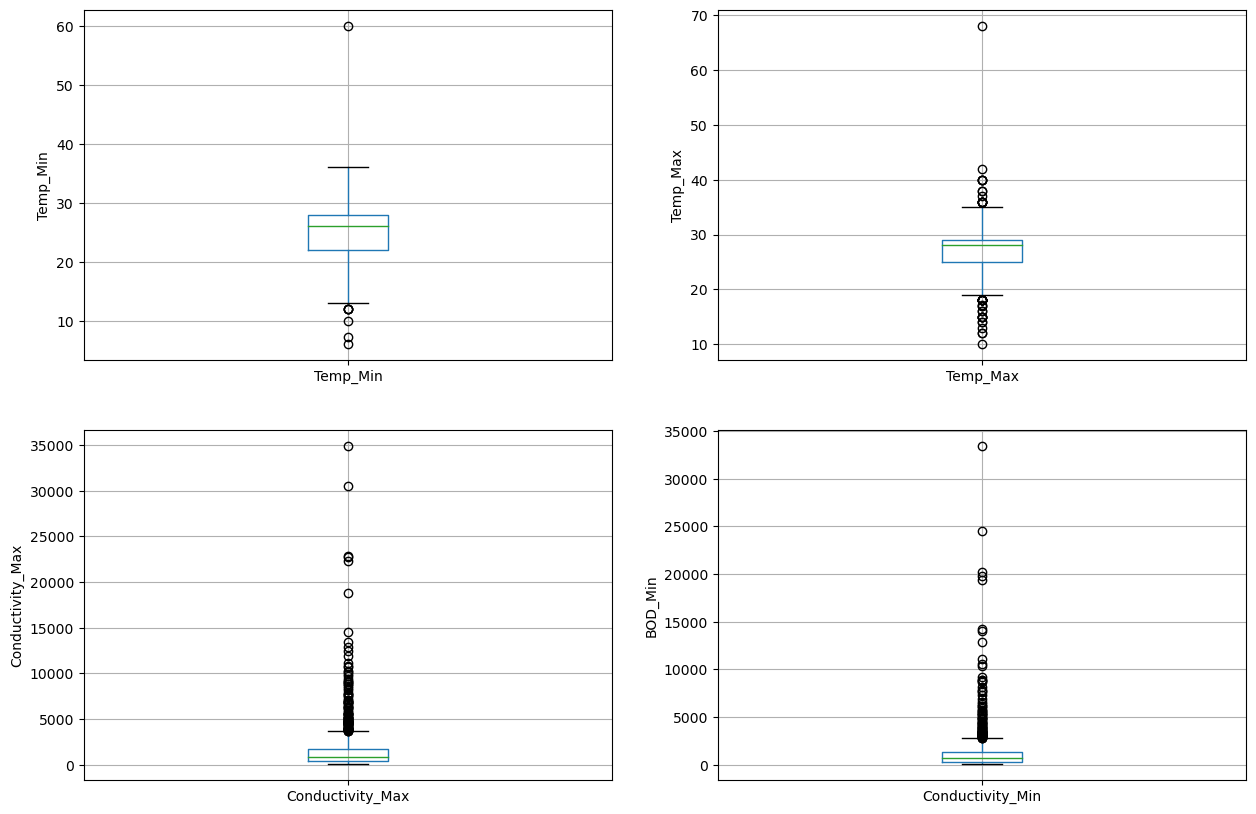

In [1752]:
# Plot the different attributes to look for outliers 

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Temp_Min')
fig.set_title('')
fig.set_ylabel('Temp_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Temp_Max')
fig.set_title('')
fig.set_ylabel('Temp_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Conductivity_Max')
fig.set_title('')
fig.set_ylabel('Conductivity_Max')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Conductivity_Min')
fig.set_title('')
fig.set_ylabel('BOD_Min')
plt.show()

In [1753]:
# find outliers for different  variables


In [1754]:
# drop the rows containing values outside the cap


In [1755]:
q1=df.Conductivity_Min.quantile(0.25)
q3=df.Conductivity_Min.quantile(0.75)
IQR=q3-q1
lower_limit=q1- 3*IQR
upper_limit=q3 + 3*IQR

In [1756]:
df.drop(df[(df['Conductivity_Min']>upper_limit)|(df['Conductivity_Min']<lower_limit)].index,axis=0,inplace=True)

df2

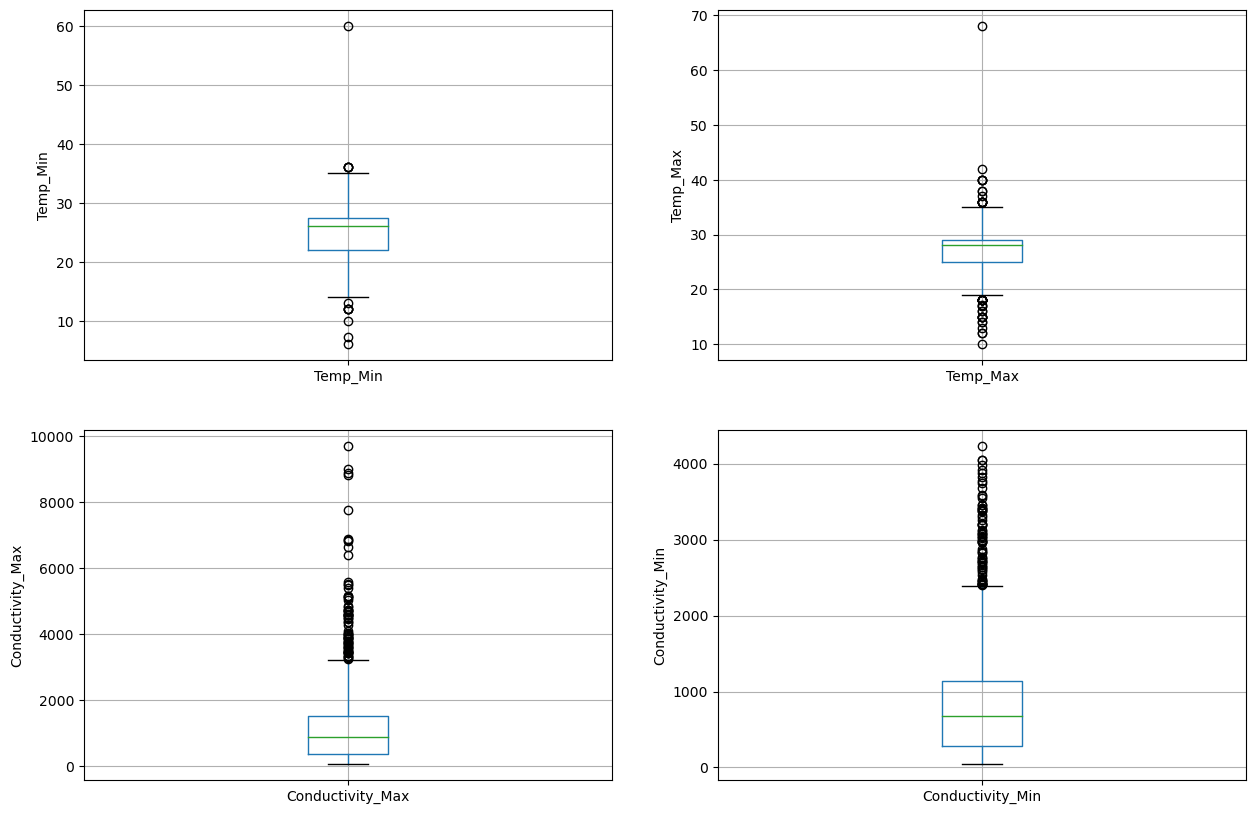

In [1757]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Temp_Min')
fig.set_title('')
fig.set_ylabel('Temp_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Temp_Max')
fig.set_title('')
fig.set_ylabel('Temp_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Conductivity_Max')
fig.set_title('')
fig.set_ylabel('Conductivity_Max')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Conductivity_Min')
fig.set_title('')
fig.set_ylabel('Conductivity_Min')
plt.show()

In [1758]:
pd.set_option('display.max_columns', None)
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BOREWELL,Type_GROUNDWATER,Type_HANDPUMP,Type_INDUSTRIALAREA,Type_OPENWELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000
mean,24.983318,27.096272,7.084688,7.606477,879.117428,1187.908201,0.864865,0.992451,1.931351,3.574916,26.672414,35.018360,61.104194,101.861417,588.271062,761.229217,1.162377,1.537936,0.001357,0.001465,0.191053,0.169618,0.082013,0.015843,0.015843,0.089469,0.178938,0.257223,16.487418
std,4.086635,4.076048,2.051053,4.121708,810.196013,1235.011120,8.261454,8.424658,3.402637,13.401735,161.206410,191.084758,264.878069,415.654676,514.557988,734.655656,25.643233,33.821032,0.003782,0.004217,0.393314,0.375472,0.274513,0.124928,0.124928,0.285552,0.383479,0.437307,9.756938
min,6.000000,10.000000,-7.780000,-8.330000,43.000000,49.000000,0.000000,0.000000,0.000000,-9.980000,-28.000000,0.000000,0.000000,0.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.000000,6.850000,7.170000,285.000000,347.000000,0.000000,0.000000,0.420000,0.680000,0.000000,0.000000,0.000000,0.000000,212.000000,276.000000,0.230000,0.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,28.000000,7.200000,7.470000,676.000000,870.500000,0.000000,0.000000,0.860000,1.595000,2.000000,2.000000,4.500000,8.000000,470.000000,578.000000,0.310000,0.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,27.500000,29.000000,7.490000,7.800000,1132.000000,1504.000000,1.200000,1.200000,1.820000,3.770000,3.000000,4.000000,17.000000,23.000000,760.000000,932.000000,0.440000,0.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
max,60.000000,68.000000,32.650000,97.390000,4230.000000,9710.000000,269.000000,269.000000,36.240000,408.000000,2400.000000,3800.000000,3500.000000,7000.000000,3354.000000,6020.000000,840.000000,1108.000000,0.043000,0.043000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


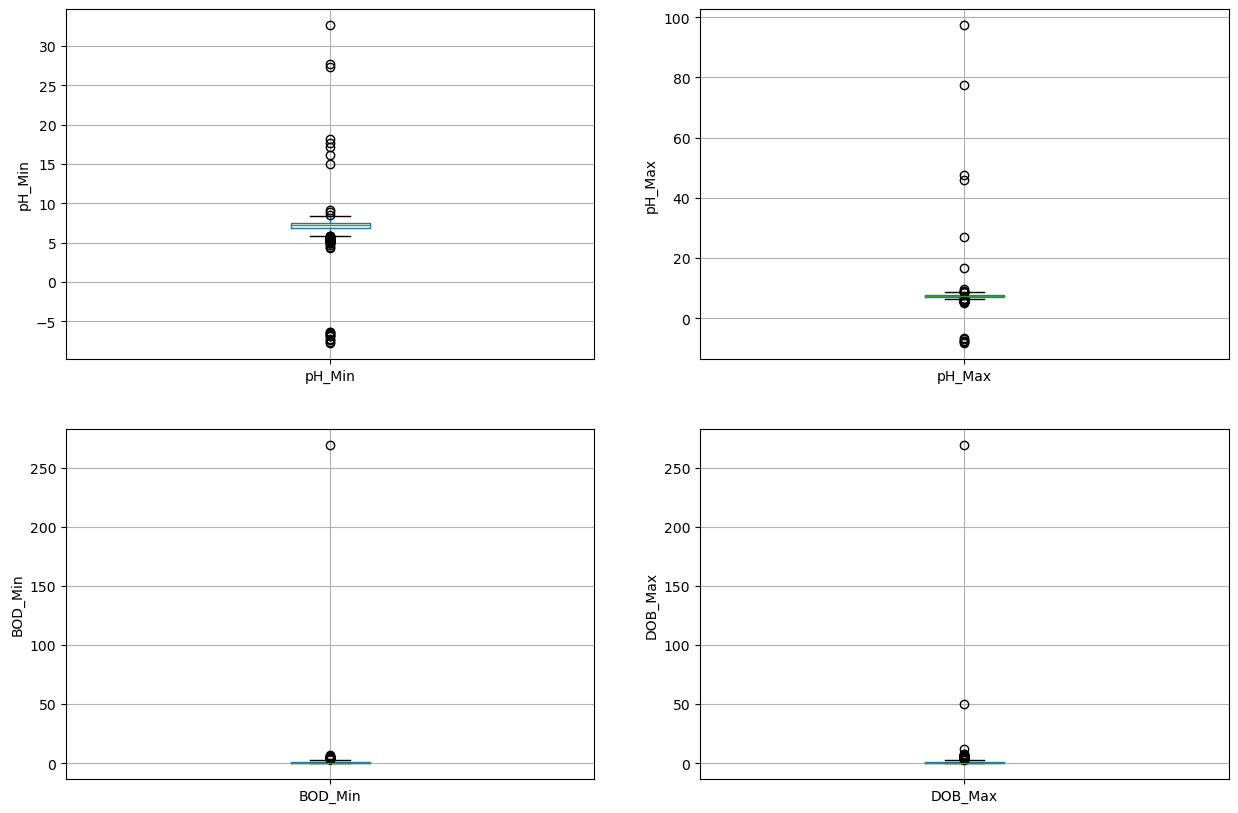

In [1759]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='pH_Min')
fig.set_title('')
fig.set_ylabel('pH_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='pH_Max')
fig.set_title('')
fig.set_ylabel('pH_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='BOD_Min')
fig.set_title('')
fig.set_ylabel('BOD_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='DOB_Max')
fig.set_title('')
fig.set_ylabel('DOB_Max')
plt.show()

In [1760]:
q1=df.pH_Min.quantile(0.25)
q3=df.pH_Min.quantile(0.75)
IQR=q3-q1
lower_limit=q1- 1.5*IQR
upper_limit=q3 + 1.5*IQR

In [1761]:
df.drop(df[(df['pH_Min']>upper_limit)|(df['pH_Min']<lower_limit)].index,axis=0,inplace=True)

In [1762]:
q1=df.pH_Max.quantile(0.25)
q3=df.pH_Max.quantile(0.75)
IQR=q3-q1
lower_limit=q1- 3*IQR
upper_limit=q3 + 3*IQR

In [1763]:
df.drop(df[(df['pH_Max']>upper_limit)|(df['pH_Max']<lower_limit)].index,axis=0,inplace=True)

In [1764]:
q1=df.BOD_Min.quantile(0.25)
q3=df.BOD_Min.quantile(0.75)
IQR=q3-q1
lower_limit=q1- 2*IQR
upper_limit=q3 + 10*IQR

In [1765]:
df.drop(df[(df['BOD_Min']>upper_limit)|(df['BOD_Min']<lower_limit)].index,axis=0,inplace=True)

In [1766]:
q1=df.DOB_Max.quantile(0.25)
q3=df.DOB_Max.quantile(0.75)
IQR=q3-q1
lower_limit=q1- 1*IQR
upper_limit=q3 + 10*IQR

In [1767]:
df.drop(df[(df['DOB_Max']>upper_limit)|(df['DOB_Max']<lower_limit)].index,axis=0,inplace=True)

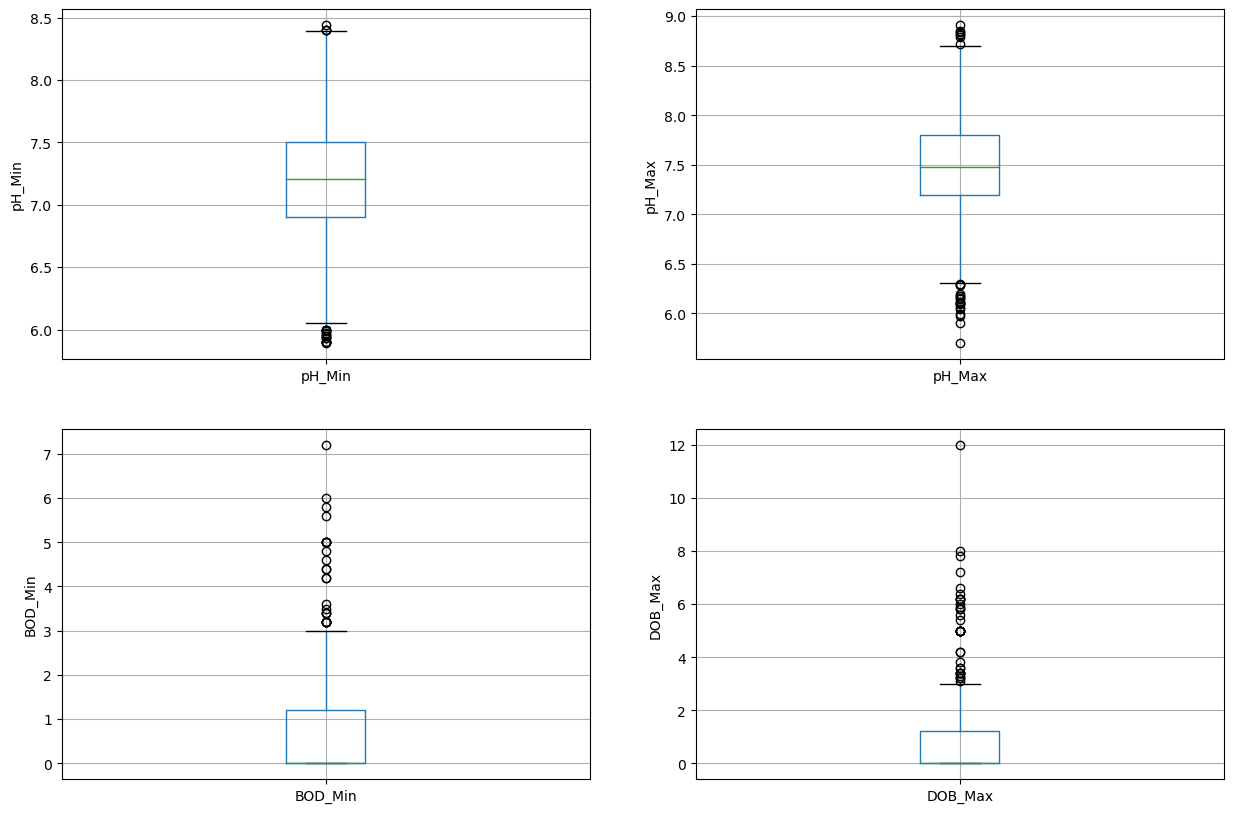

In [1768]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='pH_Min')
fig.set_title('')
fig.set_ylabel('pH_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='pH_Max')
fig.set_title('')
fig.set_ylabel('pH_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='BOD_Min')
fig.set_title('')
fig.set_ylabel('BOD_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='DOB_Max')
fig.set_title('')
fig.set_ylabel('DOB_Max')
plt.show()

In [1769]:
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BOREWELL,Type_GROUNDWATER,Type_HANDPUMP,Type_INDUSTRIALAREA,Type_OPENWELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,25.045464,27.140323,7.193871,7.488821,910.858871,1228.913810,0.612399,0.697480,1.971925,3.705953,27.293044,31.281452,61.393145,98.652923,606.685181,782.379990,1.204264,1.601573,0.001353,0.001458,0.195565,0.177419,0.083669,0.016129,0.011089,0.084677,0.173387,0.258065,16.329637
std,3.909591,3.848095,0.470765,0.506468,816.441496,1246.737211,1.053751,1.288865,3.479861,13.911055,167.120020,179.141947,272.721354,413.065851,519.879117,737.603384,26.660516,35.166579,0.003815,0.004244,0.396835,0.382216,0.277031,0.126035,0.104770,0.278541,0.378773,0.437790,9.822194
min,6.000000,10.000000,5.890000,5.700000,43.000000,49.000000,0.000000,0.000000,0.000000,-9.980000,-28.000000,0.000000,0.000000,0.000000,29.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.000000,6.900000,7.200000,314.000000,385.750000,0.000000,0.000000,0.420000,0.687500,0.000000,0.000000,0.000000,0.000000,231.500000,312.000000,0.240000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,28.000000,7.210000,7.475000,676.000000,870.500000,0.000000,0.000000,0.860000,1.595000,2.000000,2.000000,4.500000,8.000000,470.000000,578.000000,0.310000,0.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,28.000000,29.125000,7.500000,7.800000,1164.750000,1537.000000,1.200000,1.200000,1.867500,3.857500,3.600000,4.500000,16.250000,23.000000,772.500000,973.000000,0.440000,0.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
max,36.000000,40.000000,8.440000,8.910000,4230.000000,9710.000000,7.200000,12.000000,36.240000,408.000000,2400.000000,3800.000000,3500.000000,7000.000000,3354.000000,6020.000000,840.000000,1108.000000,0.043000,0.043000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


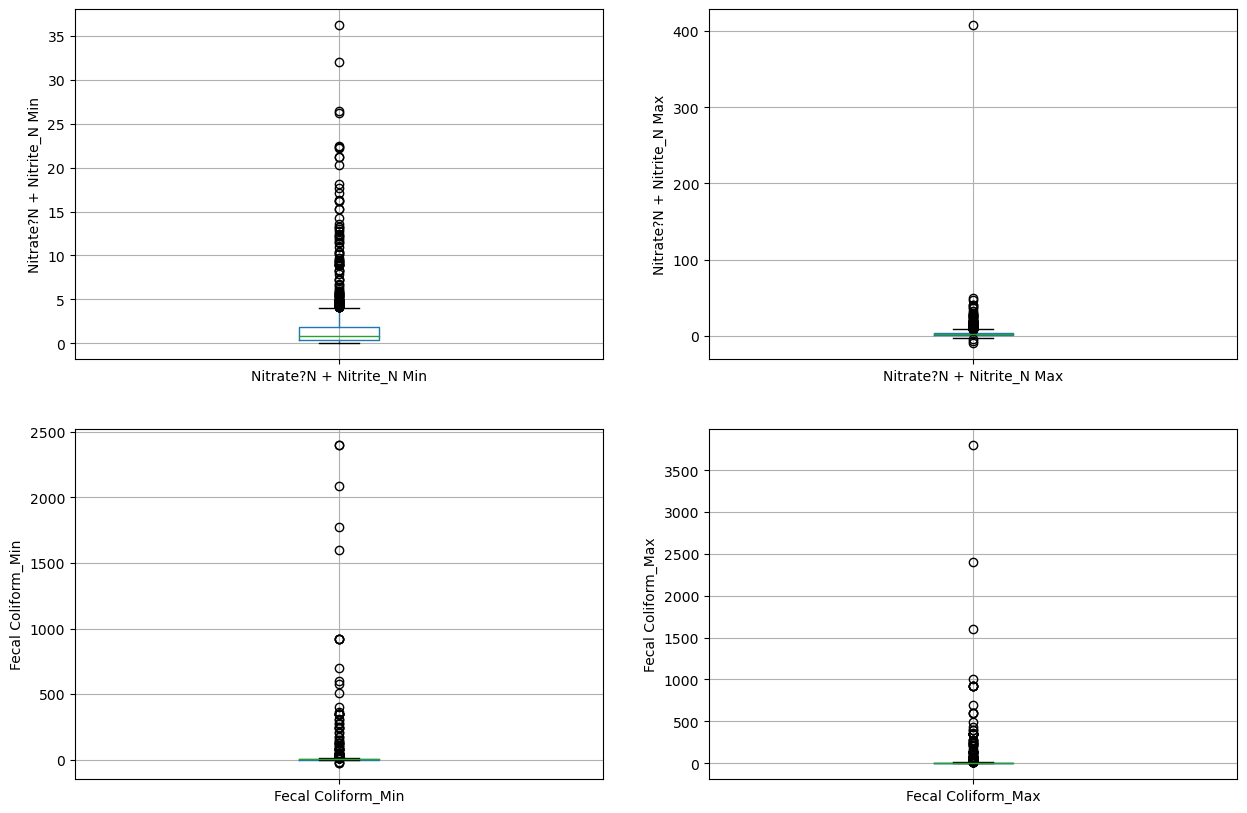

In [1770]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Min')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Max')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fecal Coliform_Min')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fecal Coliform_Max')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Max')
plt.show()

In [1771]:
q1=df['Nitrate?N + Nitrite_N Max'].quantile(0.25)
q3=df['Nitrate?N + Nitrite_N Max'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 2*IQR
upper_limit=q3 + 10*IQR

In [1772]:
df.drop(df[(df['Nitrate?N + Nitrite_N Max']>upper_limit)|(df['Nitrate?N + Nitrite_N Max']<lower_limit)].index,axis=0,inplace=True)

In [1773]:
q1=df['Total Coliform_Max'].quantile(0.25)
q3=df['Total Coliform_Max'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 2*IQR
upper_limit=q3 + 15*IQR

In [1774]:
df.drop(df[(df['Total Coliform_Max']>upper_limit)|(df['Total Coliform_Max']<lower_limit)].index,axis=0,inplace=True)

In [1775]:
q1=df['Fecal Coliform_Max'].quantile(0.25)
q3=df['Fecal Coliform_Max'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 2*IQR
upper_limit=q3 + 30*IQR

In [1776]:
df.drop(df[(df['Fecal Coliform_Max']>upper_limit)|(df['Fecal Coliform_Max']<lower_limit)].index,axis=0,inplace=True)

In [1777]:
q1=df['Fecal Coliform_Min'].quantile(0.25)
q3=df['Fecal Coliform_Min'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 2*IQR
upper_limit=q3 + 100*IQR

In [1778]:
df.drop(df[(df['Fecal Coliform_Min']>upper_limit)|(df['Fecal Coliform_Min']<lower_limit)].index,axis=0,inplace=True)

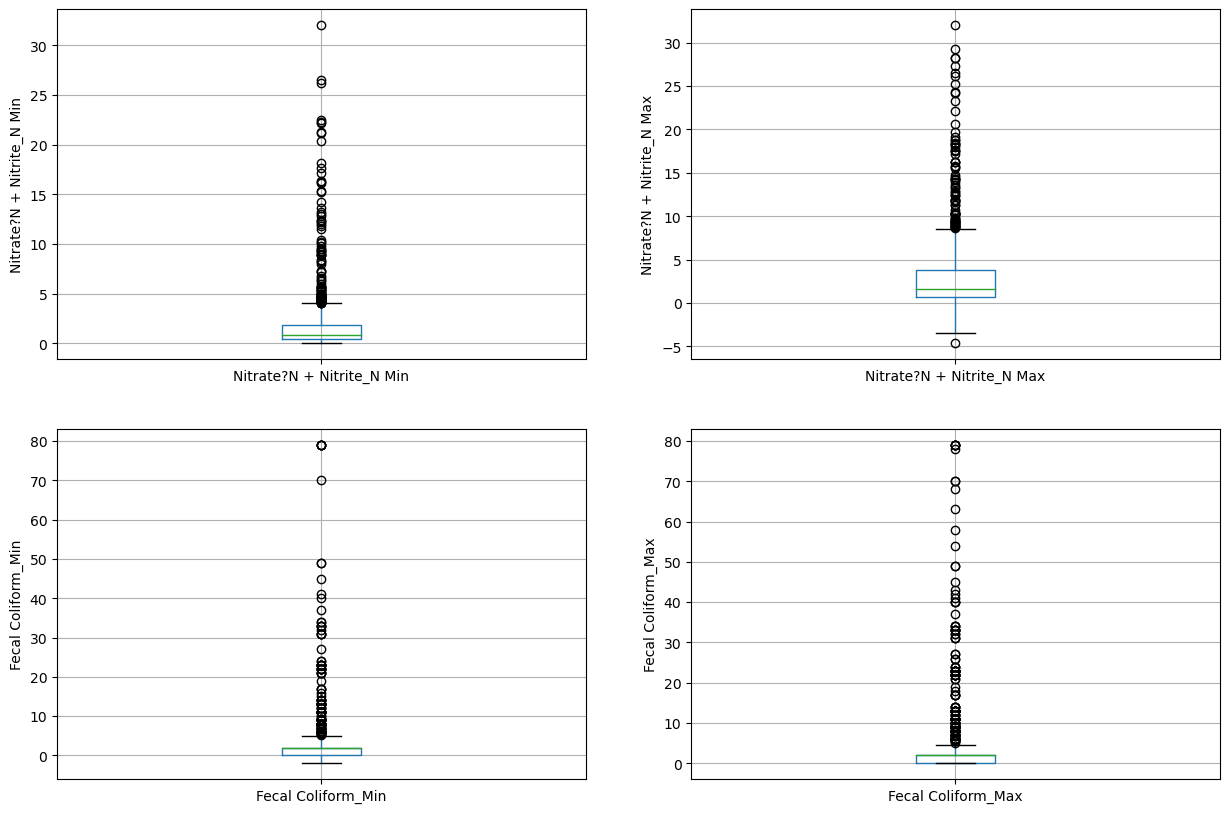

In [1779]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Min')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Max')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fecal Coliform_Min')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fecal Coliform_Max')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Max')
plt.show()

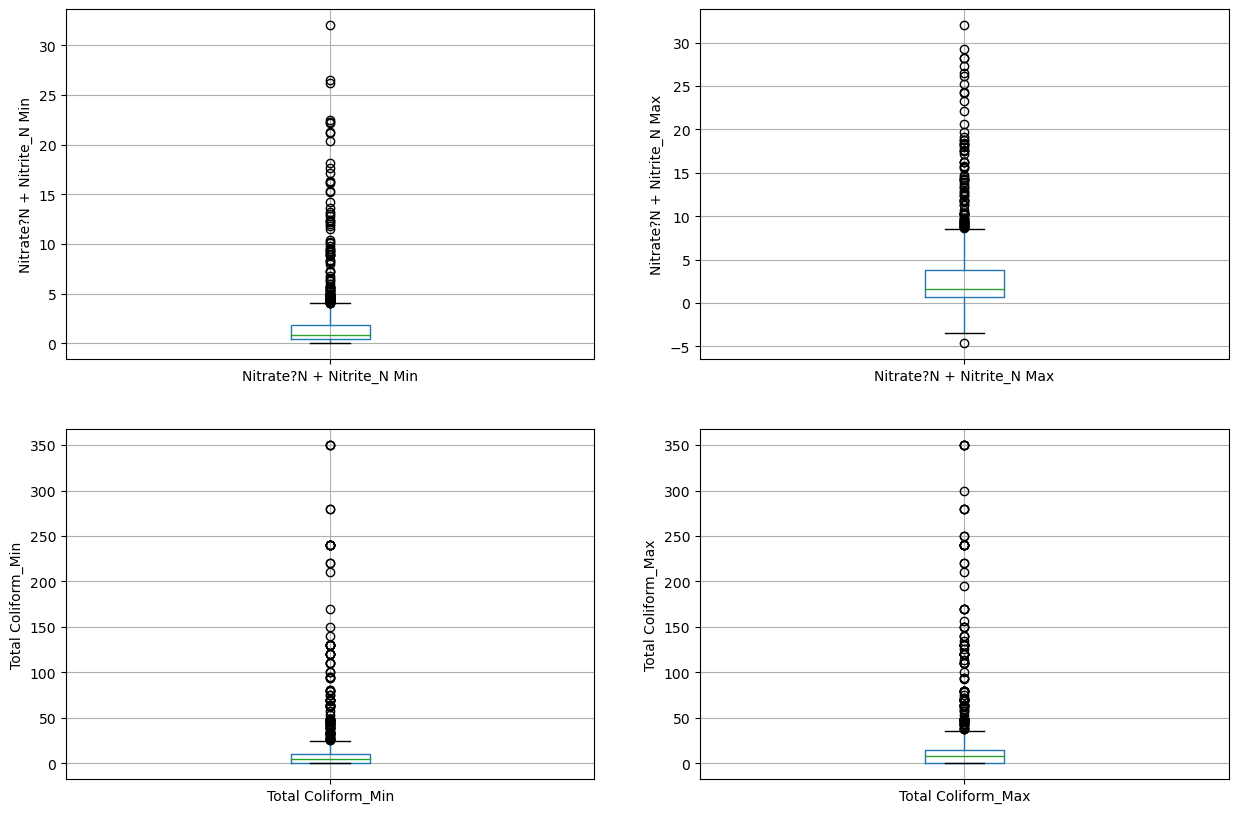

In [1780]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Min')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Max')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Total Coliform_Min')
fig.set_title('')
fig.set_ylabel('Total Coliform_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Total Coliform_Max')
fig.set_title('')
fig.set_ylabel('Total Coliform_Max')
plt.show()

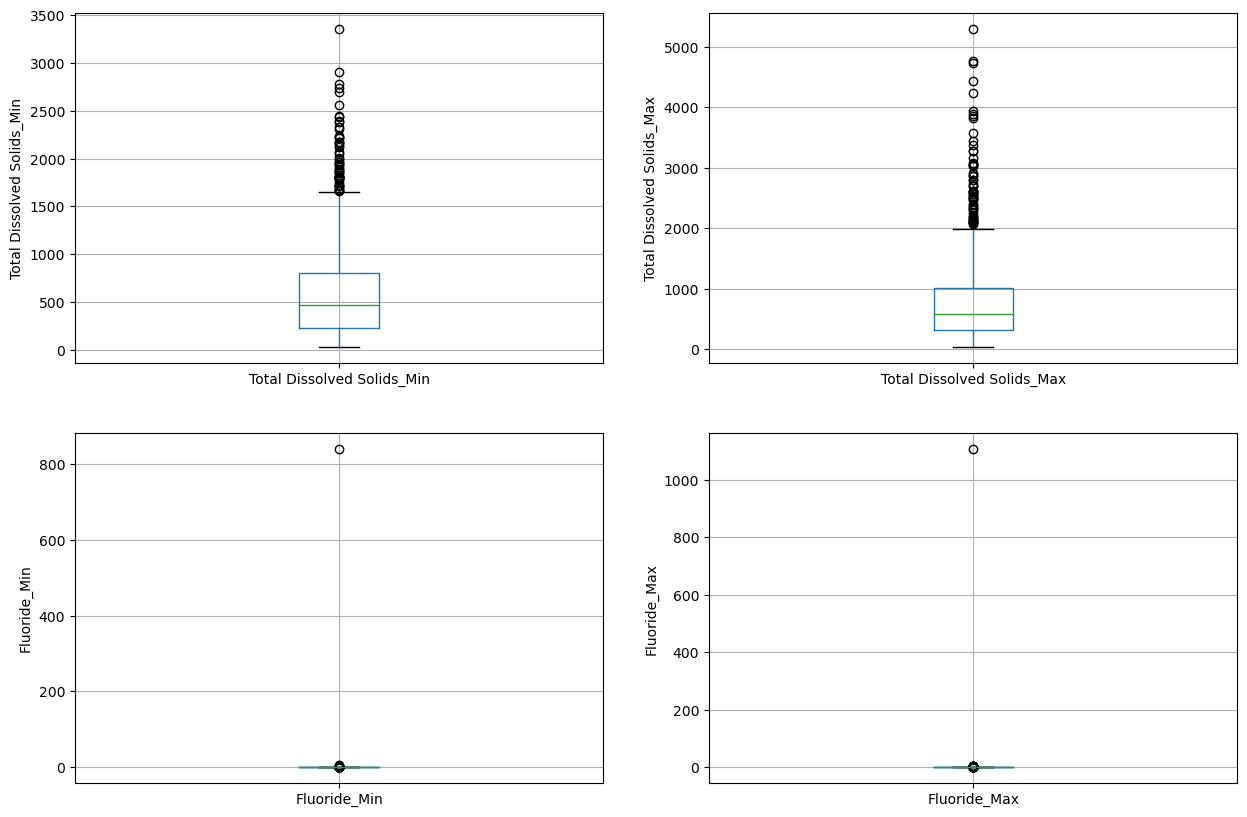

In [1781]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Total Dissolved Solids_Min')
fig.set_title('')
fig.set_ylabel('Total Dissolved Solids_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Total Dissolved Solids_Max')
fig.set_title('')
fig.set_ylabel('Total Dissolved Solids_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fluoride_Min')
fig.set_title('')
fig.set_ylabel('Fluoride_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fluoride_Max')
fig.set_title('')
fig.set_ylabel('Fluoride_Max')
plt.show()

In [1782]:
q1=df['Fluoride_Min'].quantile(0.25)
q3=df['Fluoride_Min'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 2*IQR
upper_limit=q3 + 20*IQR

In [1783]:
df.drop(df[(df['Fluoride_Min']>upper_limit)|(df['Fluoride_Min']<lower_limit)].index,axis=0,inplace=True)

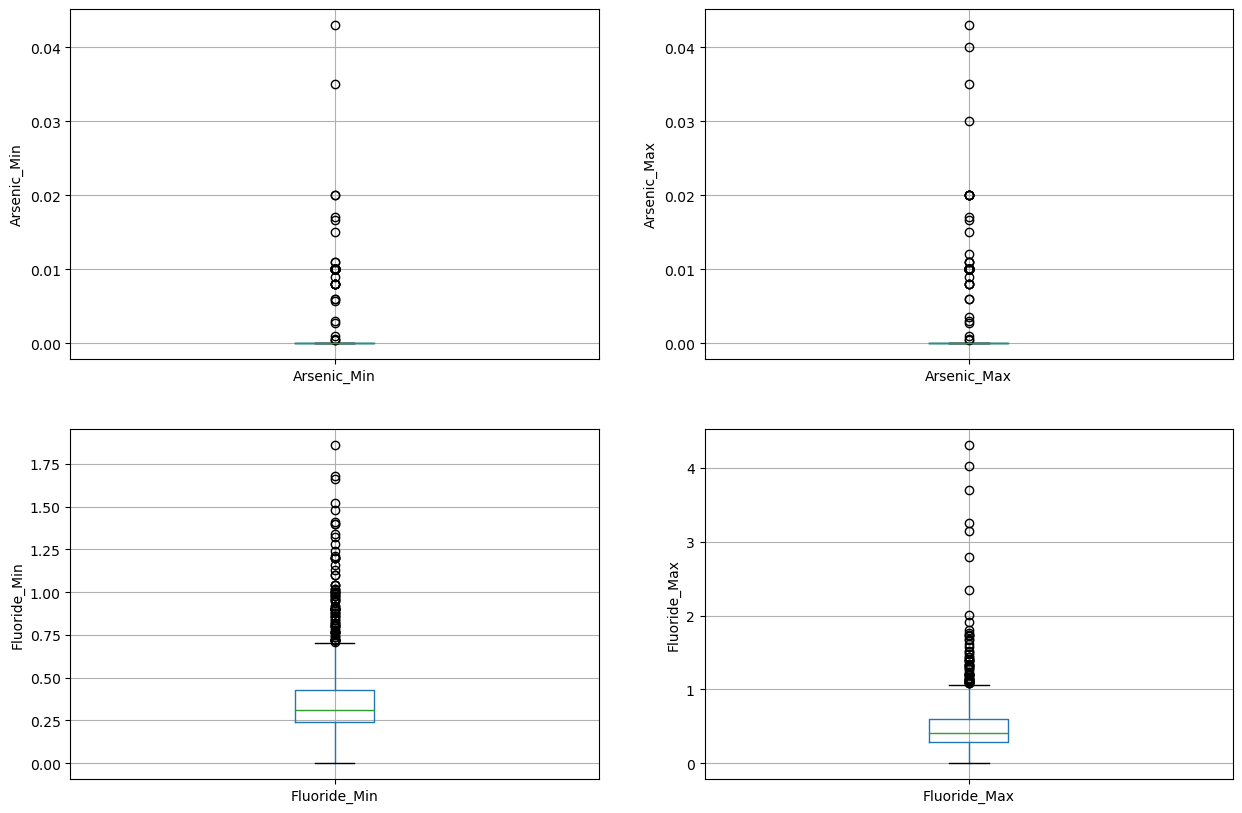

In [1784]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Arsenic_Min')
fig.set_title('')
fig.set_ylabel('Arsenic_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Arsenic_Max')
fig.set_title('')
fig.set_ylabel('Arsenic_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fluoride_Min')
fig.set_title('')
fig.set_ylabel('Fluoride_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fluoride_Max')
fig.set_title('')
fig.set_ylabel('Fluoride_Max')
plt.show()

In [1785]:
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BOREWELL,Type_GROUNDWATER,Type_HANDPUMP,Type_INDUSTRIALAREA,Type_OPENWELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.00000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,25.019426,27.083223,7.200960,7.488841,925.924945,1243.091611,0.595254,0.673620,1.93511,3.127395,3.590397,4.568874,15.397241,21.069205,614.872737,790.665508,0.353587,0.481882,0.001381,0.001497,0.198675,0.181015,0.082781,0.015453,0.009934,0.089404,0.162252,0.260486,16.624724
std,3.965077,3.939527,0.471596,0.508590,822.482760,1234.070241,1.035796,1.261569,3.35477,4.488428,8.585964,10.528521,38.716619,46.530094,523.158184,734.646812,0.274525,0.436676,0.003871,0.004332,0.399224,0.385244,0.275704,0.123412,0.099227,0.285484,0.368885,0.439142,9.837149
min,6.000000,10.000000,5.890000,5.700000,43.000000,49.000000,0.000000,0.000000,0.00000,-4.640000,-2.000000,0.000000,0.000000,0.000000,29.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.000000,6.900000,7.200000,316.000000,393.000000,0.000000,0.000000,0.41000,0.682500,0.000000,0.000000,0.000000,0.000000,234.000000,312.000000,0.240000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,28.000000,7.210000,7.480000,676.000000,870.500000,0.000000,0.000000,0.86000,1.595000,2.000000,2.000000,4.500000,8.000000,470.000000,578.000000,0.310000,0.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,27.950000,29.275000,7.500000,7.800000,1198.000000,1618.000000,1.100000,1.200000,1.86000,3.845000,2.000000,2.000000,10.000000,15.000000,802.000000,1011.500000,0.427500,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
max,36.000000,40.000000,8.440000,8.910000,4230.000000,9710.000000,7.200000,12.000000,32.04000,32.040000,79.000000,79.000000,350.000000,350.000000,3354.000000,5290.000000,1.860000,4.310000,0.043000,0.043000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [1786]:
df.shape


(906, 30)

In [1787]:
lb=LabelEncoder()
df['DrinkabilityN']=lb.fit_transform(df['Drinkability'])

df1['DrinkabilityN']=lb.fit_transform(df1['Drinkability'])

df.drop(columns=['Drinkability'],axis=1,inplace=True)

df1.drop(columns=['Drinkability'],axis=1,inplace=True)

In [1788]:

df2=df['DrinkabilityN']
df3=df1['DrinkabilityN']
df.drop(columns=['DrinkabilityN'],axis=1,inplace=True)
df1.drop(columns=['DrinkabilityN'],axis=1,inplace=True)

In [1789]:
from sklearn.model_selection import train_test_split

In [1790]:
df2.value_counts()

0    470
1    436
Name: DrinkabilityN, dtype: int64

In [1791]:
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BOREWELL,Type_GROUNDWATER,Type_HANDPUMP,Type_INDUSTRIALAREA,Type_OPENWELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.00000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,25.019426,27.083223,7.200960,7.488841,925.924945,1243.091611,0.595254,0.673620,1.93511,3.127395,3.590397,4.568874,15.397241,21.069205,614.872737,790.665508,0.353587,0.481882,0.001381,0.001497,0.198675,0.181015,0.082781,0.015453,0.009934,0.089404,0.162252,0.260486,16.624724
std,3.965077,3.939527,0.471596,0.508590,822.482760,1234.070241,1.035796,1.261569,3.35477,4.488428,8.585964,10.528521,38.716619,46.530094,523.158184,734.646812,0.274525,0.436676,0.003871,0.004332,0.399224,0.385244,0.275704,0.123412,0.099227,0.285484,0.368885,0.439142,9.837149
min,6.000000,10.000000,5.890000,5.700000,43.000000,49.000000,0.000000,0.000000,0.00000,-4.640000,-2.000000,0.000000,0.000000,0.000000,29.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.000000,6.900000,7.200000,316.000000,393.000000,0.000000,0.000000,0.41000,0.682500,0.000000,0.000000,0.000000,0.000000,234.000000,312.000000,0.240000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,28.000000,7.210000,7.480000,676.000000,870.500000,0.000000,0.000000,0.86000,1.595000,2.000000,2.000000,4.500000,8.000000,470.000000,578.000000,0.310000,0.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,27.950000,29.275000,7.500000,7.800000,1198.000000,1618.000000,1.100000,1.200000,1.86000,3.845000,2.000000,2.000000,10.000000,15.000000,802.000000,1011.500000,0.427500,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
max,36.000000,40.000000,8.440000,8.910000,4230.000000,9710.000000,7.200000,12.000000,32.04000,32.040000,79.000000,79.000000,350.000000,350.000000,3354.000000,5290.000000,1.860000,4.310000,0.043000,0.043000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [1792]:
x_train,x_test,y_train,y_test=train_test_split(df,df2,test_size=0.3)

x_train1,x_test1,y_train1,y_test1=train_test_split(df1,df3,test_size=0.3)

In [1793]:
from sklearn.linear_model import LogisticRegression

In [1804]:
model=LogisticRegression(max_iter=10000)

In [1805]:
#DF where the outliers were removed
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [1806]:
model.score(x_test,y_test)

0.9338235294117647

In [1807]:
#DF where the outliers weren't removed

model.fit(x_train1,y_train1)

LogisticRegression(max_iter=10000)

In [1808]:
model.score(x_test1,y_test1)

0.9047619047619048

In [1809]:
from sklearn import tree

In [1810]:
#DF where the outliers were removed

model=tree.DecisionTreeClassifier()

In [1811]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [1812]:
model.score(x_test,y_test)

0.9963235294117647

In [1813]:
#DF where the outliers weren't removed

model.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [1814]:
model.score(x_test1,y_test1)

0.9880952380952381